<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/histogram/hi_gamma_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/TKC/1')
!ls -a

Mounted at /content/drive/
2300.png  2389.png  2478.png  2567.png	2656.png  2802.png  2892.png  2983.png
2301.png  2390.png  2479.png  2568.png	2657.png  2803.png  2893.png  2984.png
2302.png  2391.png  2480.png  2569.png	2658.png  2804.png  2894.png  2985.png
2303.png  2392.png  2481.png  2570.png	2659.png  2805.png  2895.png  2986.png
2304.png  2393.png  2482.png  2571.png	2660.png  2806.png  2896.png  2987.png
2305.png  2394.png  2483.png  2572.png	2661.png  2807.png  2897.png  2988.png
2306.png  2395.png  2484.png  2573.png	2662.png  2808.png  2898.png  2989.png
2307.png  2396.png  2485.png  2574.png	2663.png  2809.png  2899.png  2990.png
2308.png  2397.png  2486.png  2575.png	2664.png  2810.png  2900.png  2991.png
2309.png  2398.png  2487.png  2576.png	2665.png  2811.png  2901.png  2992.png
2310.png  2399.png  2488.png  2577.png	2666.png  2812.png  2902.png  2993.png
2311.png  2400.png  2489.png  2578.png	2667.png  2813.png  2903.png  2994.png
2312.png  2401.png  2490.png  2579.pn

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
import argparse
import cv2

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")

	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [5]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "2300.png"
}

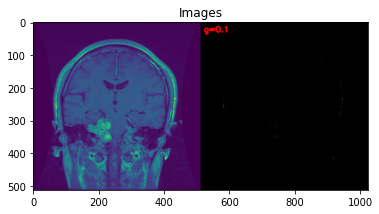

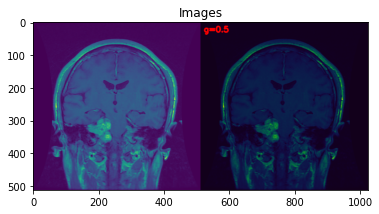

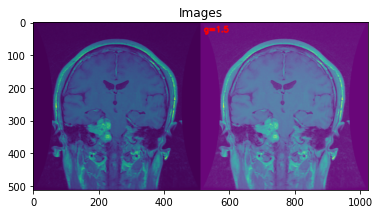

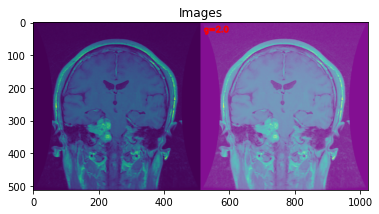

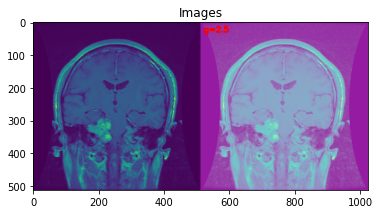

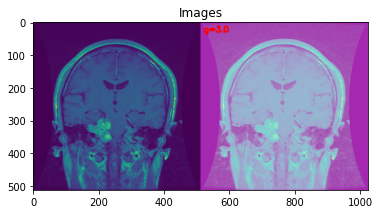

In [6]:
# load the original image
original = cv2.imread(args["image"])

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue

	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	plt_imshow("Images", np.hstack([original, adjusted]))